## Homework 5

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import statistics
import math
from scipy import stats
import h5py
import pandas as pd

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (10,6)

In [2]:
# set the background and the signal
bkgd = stats.norm.rvs(loc=0, scale=2, size = 1000000)
signal = stats.uniform.rvs(loc = 0, scale = 20, size=1000000)

<ipython-input-3-dec7ae9e9f18>:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(datacenters,signalcenters,Psd.T)


Text(0.5, 0, 'Observed data, $P(d|s)$')

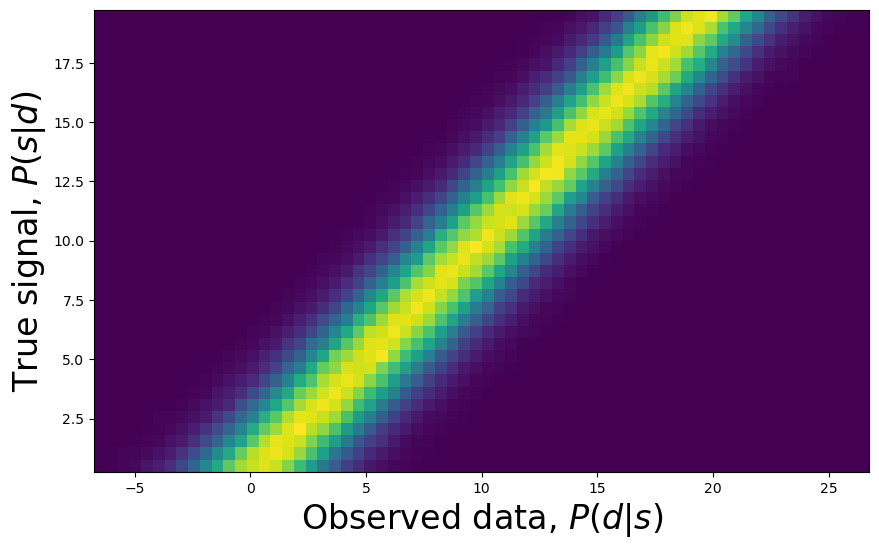

In [3]:
data = bkgd + signal

signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

## Problem 1b

Select a true injected signal and plot  𝑃(𝑑|𝑠) . (Use a stair style plot). Label your plot and clearly explain what you are plotting and how to interpret it. [Hint: this was also shown in class.]

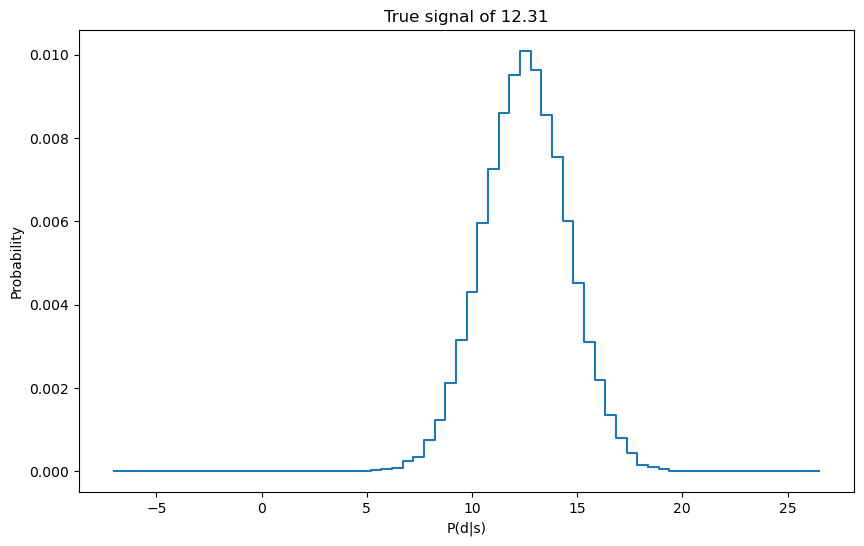

In [4]:
plt.step(temp[:-1], Psd[:, 25])
plt.title('True signal of '+str(np.round(signaledges[24], 2)))
plt.xlabel('P(d|s)')
plt.ylabel('Probability')
plt.show()

the real signal we injected into our data was 12.31

## Problem 1c

Select an observed data value and plot  𝑃(𝑠|𝑑) . (Use a stair style plot). Label your plot and clearly explain what you are plotting and how to interpret it.

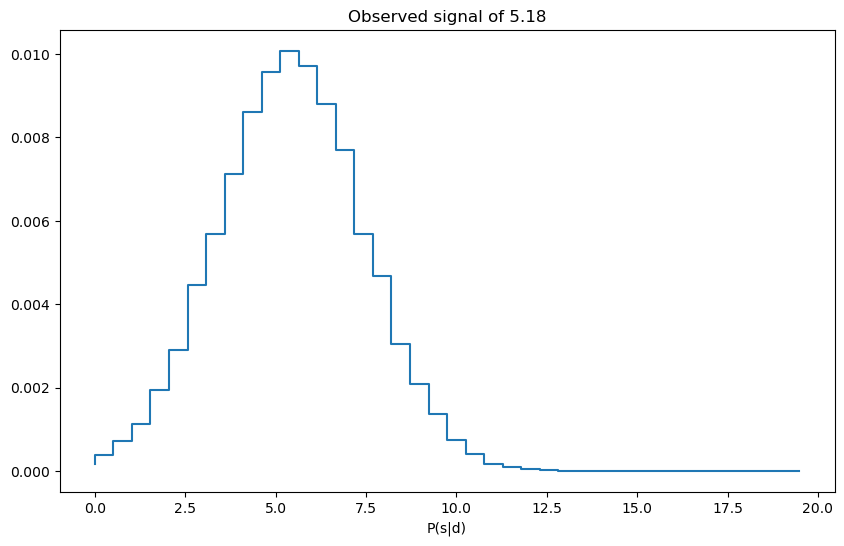

In [5]:
plt.step(temp2[:-1], Psd[25, :])
plt.title('Observed signal of ' + str(np.round(dataedges[24],2)))
plt.xlabel('P(s|d)')
plt.show()

This is what we observed from the background and signal and because the background has non-zero value so the ture signal is not equal to the observed signal. So, what we get is the signal of 5.18

## Problem 2

Now repeat the above, but with a background with non-zero mean. The easiest way would be to still have Guassian distribution but with a non-zero mean. [Hint: move it by at least a couple of  𝜎 ]. Reproduce the graphs above. Lastly overplot the  𝑃(𝑑|𝑠)  and  𝑃(𝑠|𝑑)  plots. Why are they not centered on the same value? Explain carefully.

<ipython-input-11-d62d9531f000>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(datacenters,signalcenters,Psd.T)


Text(0.5, 0, 'Observed data, $P(d|s)$')

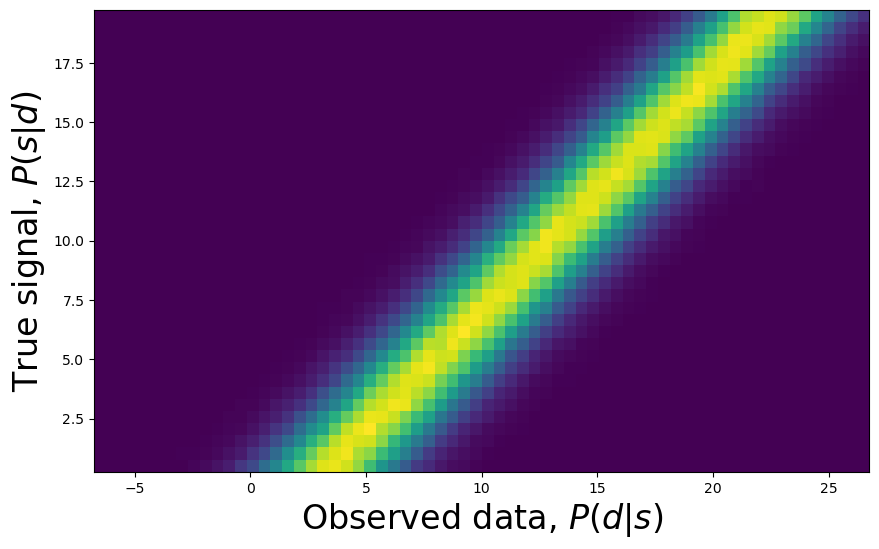

In [11]:
bkgd = stats.norm.rvs(loc=3, scale=2, size = 1000000)
signal = stats.uniform.rvs(loc = 0, scale = 20, size=1000000)
data = bkgd + signal

signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

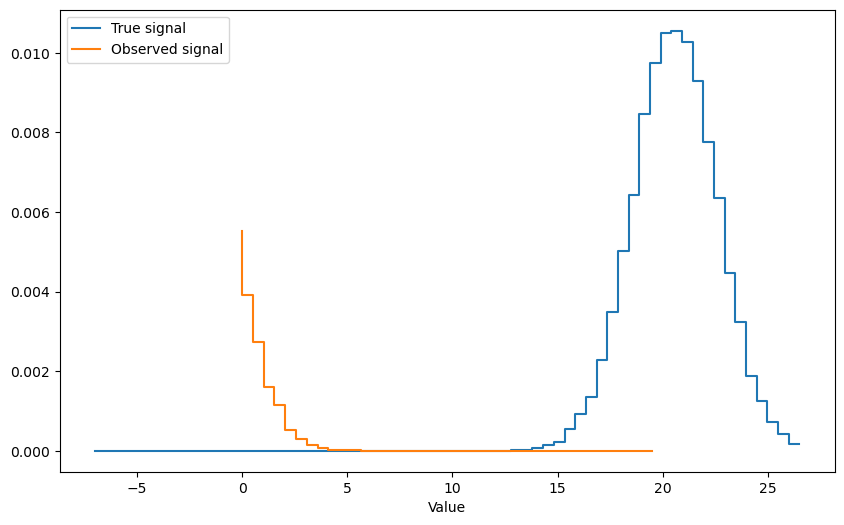

In [10]:
pds = plt.step(temp[:-1], Psd[:, 25], label='True signal')
psd = plt.step(temp2[:-1],Psd[25, :], label='Observed signal')
plt.xlabel('Value')
plt.legend()
plt.show()

So the plots for $P(d|s)$ and $P(s|d)$ are not centered at the same value it because they represent different things. The $P(d|s)$ is the true signal that measure the probability of getting a random value from the distribution and the $P(s|d)$ is the observed signal that looks at the real value of the signal. And with a higher mean in the background, the observed signal will be shifter higher.